<a href="https://colab.research.google.com/github/gacevedob/Covid-19/blob/main/Analisis_Deslizamientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de datos del Catálogo Global de Deslizamientos de Tierra (GLC)

---
##Introducción
En la ingeniería de construcción, se considera de gran importancia el estudio del impacto de los desastres naturales en el entorno construido. En este proyecto, se utiliza el conjunto de datos del Catálogo Global de Deslizamientos de Tierra (GLC) para identificar patrones, tendencias y factores de riesgo asociados con eventos de deslizamientos de tierra desencadenados por lluvias. El conjunto de datos de GLC contiene información sobre deslizamientos de tierra de todo el mundo, incluyendo su ubicación, tamaño, impacto y desencadenantes. Al analizar estos datos, el objetivo es proporcionar información que pueda informar la planificación del uso del suelo, el desarrollo de infraestructura y la preparación para desastres.

#Objetivos
- Analizar el conjunto de datos de GLC para identificar tendencias y patrones en deslizamientos de tierra desencadenados por lluvias.
- Determinar los desencadenantes y configuraciones más comunes de los deslizamientos de tierra.
- Identificar las regiones con mayor incidencia de deslizamientos de tierra y evaluar sus factores de riesgo.
- Proporcionar recomendaciones para la planificación del uso del suelo y la preparación para desastres basadas en el análisis de los datos.

#Herramientas
- Python para limpieza, manipulación y análisis de datos.
- Jupyter Notebook para desarrollo y documentación de código.
- Biblioteca Pandas para manipulación y análisis de datos.
- Bibliotecas Matplotlib y Seaborn para visualización de datos.
- Biblioteca NumPy para cálculos científicos.

#Sobre el conjunto de Datos
El conjunto de datos de GLC contiene información sobre deslizamientos de tierra de todo el mundo, incluyendo su ubicación, tamaño, impacto y desencadenantes. El conjunto de datos está disponible en formato CSV y se puede descargar del sitio web del Centro de Vuelo Espacial Goddard de la [NASA](https://gpm.nasa.gov/landslides/index.html). El conjunto de datos contiene más de 20,000 registros que abarcan desde 2007 hasta 2022. El conjunto de datos tambien se encuentra disponible en [Kaggle](https://www.kaggle.com/datasets/kazushiadachi/global-landslide-data).

#Metodología
- **Limpieza y preparación de datos:** eliminar valores faltantes y duplicados, estandarizar el formato de los datos y crear nuevas columnas para el análisis.
- **Análisis exploratorio de datos:** utilizar estadísticas descriptivas y visualizaciones para identificar patrones y tendencias en los datos.
- **Modelado:** utilizar algoritmos de aprendizaje automático para identificar los factores de riesgo más significativos para los deslizamientos de tierra y predecir su ocurrencia en diferentes regiones.
- **Evaluación:** evaluar el rendimiento de los modelos y proporcionar recomendaciones para la planificación del uso del suelo y la preparación para desastres.

#Resultados esperados
- Identificación de los factores de riesgo más significativos para los deslizamientos de tierra desencadenados por lluvias.
- Identificación de las regiones con mayor incidencia de deslizamientos de tierra y evaluación de sus factores de riesgo.
- Recomendaciones para la planificación del uso del suelo y la preparación para desastres basadas en el análisis de los datos.
- Mejora de la comprensión del impacto de los desastres naturales en el entorno construido.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install plotly==5.3.1
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [3]:
#Importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
#Cargamos el conjunto de datos a analizar
df = pd.read_csv('/content/drive/MyDrive/Global_Landslide_Catalog_Export.csv')
df.head(5)

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [5]:
#Validación del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   source_name                11033 non-null  object 
 1   source_link                10187 non-null  object 
 2   event_id                   11033 non-null  int64  
 3   event_date                 11033 non-null  object 
 4   event_time                 0 non-null      float64
 5   event_title                11033 non-null  object 
 6   event_description          10171 non-null  object 
 7   location_description       10931 non-null  object 
 8   location_accuracy          11031 non-null  object 
 9   landslide_category         11032 non-null  object 
 10  landslide_trigger          11010 non-null  object 
 11  landslide_size             11024 non-null  object 
 12  landslide_setting          10964 non-null  object 
 13  fatality_count             9648 non-null   flo

El conjunto de datos que se cargó para analizar contiene 11033 registros y 31 columnas. 
La mayoría de las columnas son de tipo objeto, pero hay algunas de tipo *float* y de tipo *integer*. 
Algunas de las columnas tienen valores nulos, lo que requerirá un proceso de limpieza de datos antes de realizar el análisis. 

- source_name: entidad de noticias que reportó el evento (texto sin formato)
- source_link: enlace a la fuente de noticias (URL del sitio web)
- event_id: identificador numérico único para el evento
- event_date: fecha y hora del evento
- event_time: hora del evento
- event_title: título de la historia de noticias (texto sin formato)
- event_description: descripción del evento (texto sin formato)
- location_description: descripción del lugar donde ocurrió el evento (texto sin formato)
- location_accuracy: precisión de la ubicación dentro de un rango (texto sin formato)
- landslide_category: categoría del deslizamiento de tierra (texto sin formato)
- landslide_trigger: causa del deslizamiento de tierra (texto sin formato)
- landslide_size: tamaño del deslizamiento de tierra (texto sin formato)
- landslide_setting: ambiente donde ocurrió el deslizamiento de tierra (texto sin formato)
- fatality_count: número de muertes relacionadas con el evento (número)
- injury_count: número de heridos relacionados con el evento (número)
- storm_name: nombre de la tormenta asociada con el evento (texto sin formato)
- photo_link: enlace a una foto relacionada con el evento (URL del sitio web)
- notes: notas adicionales sobre el evento (texto sin formato)
- event_import_source: fuente de importación de eventos (texto sin formato)
- event_import_id: identificador único del evento importado (número)
- country_name: nombre del país donde ocurrió el evento (texto sin formato)
- country_code: código del país donde ocurrió el evento (texto sin formato)
- admin_division_name: nombre de la división administrativa donde ocurrió el evento (texto sin formato)
- admin_division_population: población de la división administrativa donde ocurrió el evento (número)
- gazeteer_closest_point: punto geográfico más cercano (texto sin formato)
- gazeteer_distance: distancia al punto geográfico más cercano (número)
- submitted_date: fecha y hora en que se envió el informe del evento
- created_date: fecha y hora en que se creó el registro del evento en la base de datos
- last_edited_date: fecha y hora de la última edición del registro del evento
- longitude: longitud geográfica de la ubicación del evento (número)
- latitude: latitud geográfica de la ubicación del evento (número)

In [6]:
df.isnull().sum()

source_name                      0
source_link                    846
event_id                         0
event_date                       0
event_time                   11033
event_title                      0
event_description              862
location_description           102
location_accuracy                2
landslide_category               1
landslide_trigger               23
landslide_size                   9
landslide_setting               69
fatality_count                1385
injury_count                  5674
storm_name                   10456
photo_link                    9537
notes                        10716
event_import_source           1563
event_import_id               1562
country_name                  1562
country_code                  1564
admin_division_name           1637
admin_division_population     1562
gazeteer_closest_point        1563
gazeteer_distance             1562
submitted_date                  10
created_date                     1
last_edited_date    

##1. Data Cleaning

In [7]:
# Eliminar columnas innecesarias: algunas columnas, como "source_link" y "photo_link" event_import_source, event_import_id, gazeteer_closest_point, gazeteer_distance, submitted_date
# Estas columnas no son esenciales para el análisis y no contienen información crítica sobre los eventos de deslizamiento de tierra.

df.drop(['source_link', 'photo_link', 
         'event_import_source','event_time', 'event_import_id', 
         'gazeteer_closest_point', 
         'submitted_date', 'storm_name',"notes",'injury_count','event_id'], 
        axis=1, inplace=True)
df.head(5)

,source_name,event_date,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,country_name,country_code,admin_division_name,admin_division_population,gazeteer_distance,created_date,last_edited_date,longitude,latitude
0,AGU,08/01/2008 12:00:00 AM,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,rain,large,mine,11.0,China,CN,Shaanxi,0.0,41.02145,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,01/02/2009 02:00:00 AM,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,downpour,small,unknown,0.0,United States,US,Oregon,36619.0,0.60342,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,01/19/2007 12:00:00 AM,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,downpour,large,unknown,10.0,Peru,PE,Junín,14708.0,0.85548,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,07/31/2009 12:00:00 AM,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,monsoon,medium,unknown,1.0,Nepal,NP,Mid Western,20908.0,0.75395,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,10/16/2010 12:00:00 PM,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,tropical_cyclone,medium,unknown,0.0,Philippines,PH,Central Visayas,798634.0,2.02204,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [8]:
#Validamos los datos de la columna location_accuracy
df['location_accuracy'] = df['location_accuracy'].replace('unknown', np.nan)
df.head(5)

,source_name,event_date,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,country_name,country_code,admin_division_name,admin_division_population,gazeteer_distance,created_date,last_edited_date,longitude,latitude
0,AGU,08/01/2008 12:00:00 AM,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",NaN,landslide,rain,large,mine,11.0,China,CN,Shaanxi,0.0,41.02145,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,01/02/2009 02:00:00 AM,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,downpour,small,unknown,0.0,United States,US,Oregon,36619.0,0.60342,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,01/19/2007 12:00:00 AM,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,downpour,large,unknown,10.0,Peru,PE,Junín,14708.0,0.85548,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,07/31/2009 12:00:00 AM,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,NaN,landslide,monsoon,medium,unknown,1.0,Nepal,NP,Mid Western,20908.0,0.75395,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,10/16/2010 12:00:00 PM,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,tropical_cyclone,medium,unknown,0.0,Philippines,PH,Central Visayas,798634.0,2.02204,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [9]:
df['location_accuracy'] = df['location_accuracy'].str[:-2]

In [10]:
df.head(5)

,source_name,event_date,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,country_name,country_code,admin_division_name,admin_division_population,gazeteer_distance,created_date,last_edited_date,longitude,latitude
0,AGU,08/01/2008 12:00:00 AM,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",NaN,landslide,rain,large,mine,11.0,China,CN,Shaanxi,0.0,41.02145,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,01/02/2009 02:00:00 AM,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5,mudslide,downpour,small,unknown,0.0,United States,US,Oregon,36619.0,0.60342,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,01/19/2007 12:00:00 AM,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10,landslide,downpour,large,unknown,10.0,Peru,PE,Junín,14708.0,0.85548,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,07/31/2009 12:00:00 AM,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,NaN,landslide,monsoon,medium,unknown,1.0,Nepal,NP,Mid Western,20908.0,0.75395,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,10/16/2010 12:00:00 PM,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5,landslide,tropical_cyclone,medium,unknown,0.0,Philippines,PH,Central Visayas,798634.0,2.02204,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [11]:
df['location_accuracy'] = df['location_accuracy'].replace('exa', 0)

In [12]:
median = df['location_accuracy'].median()
df['location_accuracy'].fillna(median, inplace=True)

In [13]:
df['location_accuracy'] = df['location_accuracy'].astype(float)
df.head(5)

,source_name,event_date,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,country_name,country_code,admin_division_name,admin_division_population,gazeteer_distance,created_date,last_edited_date,longitude,latitude
0,AGU,08/01/2008 12:00:00 AM,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",5.0,landslide,rain,large,mine,11.0,China,CN,Shaanxi,0.0,41.02145,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,01/02/2009 02:00:00 AM,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5.0,mudslide,downpour,small,unknown,0.0,United States,US,Oregon,36619.0,0.60342,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,01/19/2007 12:00:00 AM,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10.0,landslide,downpour,large,unknown,10.0,Peru,PE,Junín,14708.0,0.85548,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,07/31/2009 12:00:00 AM,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,5.0,landslide,monsoon,medium,unknown,1.0,Nepal,NP,Mid Western,20908.0,0.75395,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,10/16/2010 12:00:00 PM,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5.0,landslide,tropical_cyclone,medium,unknown,0.0,Philippines,PH,Central Visayas,798634.0,2.02204,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [14]:
df=df.dropna()

In [15]:
df.info()
df=df.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7159 entries, 0 to 10019
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   source_name                7159 non-null   object 
 1   event_date                 7159 non-null   object 
 2   event_title                7159 non-null   object 
 3   event_description          7159 non-null   object 
 4   location_description       7159 non-null   object 
 5   location_accuracy          7159 non-null   float64
 6   landslide_category         7159 non-null   object 
 7   landslide_trigger          7159 non-null   object 
 8   landslide_size             7159 non-null   object 
 9   landslide_setting          7159 non-null   object 
 10  fatality_count             7159 non-null   float64
 11  country_name               7159 non-null   object 
 12  country_code               7159 non-null   object 
 13  admin_division_name        7159 non-null   obje

El resultado del proceso de limpieza de datos es un conjunto de datos con 7159 registros, donde se eliminaron columnas irrelevantes y se trataron los valores faltantes.

##2. EDA (Análisis Exploratorio de Datos)

In [16]:
df.head(5)

,source_name,event_date,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,country_name,country_code,admin_division_name,admin_division_population,gazeteer_distance,created_date,last_edited_date,longitude,latitude
0,AGU,08/01/2008 12:00:00 AM,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",5.0,landslide,rain,large,mine,11.0,China,CN,Shaanxi,0.0,41.02145,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,01/02/2009 02:00:00 AM,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5.0,mudslide,downpour,small,unknown,0.0,United States,US,Oregon,36619.0,0.60342,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,01/19/2007 12:00:00 AM,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10.0,landslide,downpour,large,unknown,10.0,Peru,PE,Junín,14708.0,0.85548,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,07/31/2009 12:00:00 AM,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,5.0,landslide,monsoon,medium,unknown,1.0,Nepal,NP,Mid Western,20908.0,0.75395,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,10/16/2010 12:00:00 PM,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5.0,landslide,tropical_cyclone,medium,unknown,0.0,Philippines,PH,Central Visayas,798634.0,2.02204,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [17]:
df.describe()

,location_accuracy,fatality_count,admin_division_population,gazeteer_distance,longitude,latitude
count,7159.000000,7159.000000,7.159000e+03,7159.000000,7159.000000,7159.000000
mean,11.981143,3.957955,1.775537e+05,11.520431,12.629839,23.899496
std,16.959530,69.209489,8.946296e+05,15.876217,97.538636,20.750449
min,0.000000,0.000000,0.000000e+00,0.000030,-170.799800,-46.774800
25%,5.000000,0.000000,2.008000e+03,2.214150,-84.270750,10.836100
50%,5.000000,0.000000,8.673000e+03,5.730120,48.580000,28.200000
75%,10.000000,1.000000,4.143450e+04,14.905425,98.677250,38.882900
max,250.000000,5000.000000,1.269184e+07,199.448930,179.410400,72.627500


In [18]:
cols = ["location_accuracy", "fatality_count", "admin_division_population", "gazeteer_distance"]

sns.set_style("darkgrid")
sns.set_palette("Dark2")

for col in cols:
    fig = px.box(df, y=col, title="Boxplot de {}".format(col),
                 height=400, width=600,
                 template='plotly',
                 color_discrete_sequence=['#1f77b4'])
    fig.update_layout(title_font_size=16, font=dict(size=12),
                      xaxis_title=col, yaxis_title="", margin=dict(l=50, r=50, t=50, b=50),
                      plot_bgcolor='white', paper_bgcolor='white')
    fig.show()

Este código genera cuatro gráficos de caja (boxplots) utilizando la librería Seaborn y las columnas: "location_accuracy", "fatality_count", "admin_division_population" y "gazeteer_distance" del DataFrame "df".

Un gráfico de caja es una representación visual de la distribución de los datos que muestra la mediana, los cuartiles y los valores atípicos. En este caso, los boxplots muestran la distribución de los valores de las variables mencionadas en el DataFrame.

La línea horizontal dentro del cuadro representa la mediana, el cuadro en sí representa el rango intercuartil (IQR) que abarca el 50% de los datos y los bigotes que se extienden desde el cuadro representan los datos fuera del rango intercuartil. Los puntos fuera de los bigotes se consideran valores atípicos.

El primer gráfico de caja muestra la distribución de los valores de "location_accuracy". Se puede observar que la mayoría de los deslizamientos reportados se reportaron con precision, pero hay varios valores atípicos que deben tratarse.

El segundo gráfico de caja muestra la distribución de los valores de "fatality_count". Se puede observar que la mayoría de los deslizamientos reportados no tuvieron víctimas mortales, pero hay varios valores atípicos que indican deslizamientos que causaron un número significativo de muertes.

El tercer gráfico de caja muestra la distribución de los valores de "admin_division_population". Este gráfico muestra que la mayoría de los deslizamientos reportados ocurrieron en áreas con poblaciones relativamente pequeñas, pero también hay varios valores atípicos que indican deslizamientos que ocurrieron en áreas más pobladas.

El cuarto gráfico de caja muestra la distribución de los valores de "gazeteer_distance". Esta variable mide la distancia a la ciudad más cercana y el gráfico muestra que la mayoría de los deslizamientos reportados ocurrieron cerca de una ciudad, pero también hay varios valores atípicos que indican deslizamientos que ocurrieron en áreas más alejadas de las ciudades.

##Remoción de valores atípicos

Primero, se calculan los cuartiles (q1 y q3) y el rango intercuartil (q2) para cada una de las columnas. Luego, se utiliza la fórmula del rango intercuartil para determinar los límites superior e inferior de los bigotes en los gráficos de caja.

Finalmente, se utiliza la función de selección de filas con condicionales booleanos en pandas para eliminar las filas que están fuera de los límites de los bigotes. Cada eliminación de valores atípicos se realiza sobre el resultado de la eliminación anterior.

Es importante destacar que los valores atípicos pueden ser indicativos de datos importantes, y eliminarlos puede reducir la precisión del análisis. La eliminación de valores atípicos debe realizarse con precaución y debe basarse en una comprensión profunda de los datos y del contexto en el que se recopilaron.

In [19]:
q3=df["admin_division_population"].quantile(0.75)
q1=df["admin_division_population"].quantile(0.15)
q2=(q3-q1)
foutlier_1=df[~((df["admin_division_population"]>(q3+1.5*q2)) | (df["admin_division_population"]<(q1-1.5*q2)))]

In [20]:
q3=foutlier_1["fatality_count"].quantile(0.85)
q1=foutlier_1["fatality_count"].quantile(0.25)
q2=(q3-q1)
foutlier_2=foutlier_1[~((foutlier_1["fatality_count"]>(q3+1.5*q2)) | (foutlier_1["admin_division_population"]<(q1-1.5*q2)))]

In [21]:
q3=foutlier_2["gazeteer_distance"].quantile(0.75)
q1=foutlier_2["gazeteer_distance"].quantile(0.15)
q2=(q3-q1)
foutlier_3=foutlier_2[~((foutlier_2["gazeteer_distance"]>(q3+1.5*q2)) | (foutlier_2["gazeteer_distance"]<(q1-1.5*q2)))]

In [22]:
q3=foutlier_3["location_accuracy"].quantile(0.75)
q1=foutlier_3["location_accuracy"].quantile(0.15)
q2=(q3-q1)
foutlier_4=foutlier_3[~((foutlier_3["location_accuracy"]>(q3+1.5*q2)) | (foutlier_3["location_accuracy"]<(q1-1.5*q2)))]

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

cols = ["location_accuracy", "fatality_count", "admin_division_population", "gazeteer_distance"]

sns.set_style("darkgrid")
sns.set_palette("Dark2")

for col in cols:
    fig = px.box(df, y=col, title="Boxplot de {}".format(col),
                 height=400, width=600,
                 template='plotly',
                 color_discrete_sequence=['#1f77b4'])
    fig.update_layout(title_font_size=16, font=dict(size=12),
                      xaxis_title=col, yaxis_title="", margin=dict(l=50, r=50, t=50, b=50),
                      plot_bgcolor='white', paper_bgcolor='white')
    fig.show()


Los gráficos generados son boxplots para cuatro variables numéricas en el dataset: "location_accuracy", "fatality_count", "admin_division_population", "gazeteer_distance".

En los boxplots, la caja representa el rango intercuartil (IQR) que contiene el 50% de los datos, y la línea dentro de la caja representa la mediana. Los bigotes se extienden desde la caja hasta los datos que están dentro de 1.5 veces el IQR. Los puntos que están más allá de los bigotes se consideran valores atípicos.

El boxplot para "location_accuracy" muestra que la mayoría de las ubicaciones tienen una precisión relativamente alta en términos de coordenadas geográficas, ya que la mediana se encuentra en el valor máximo de 10 y la mayoría de los valores se encuentran entre 5 y 10.

El boxplot para "fatality_count" muestra que la mayoría de los deslizamientos de tierra no resultaron en muertes, ya que la mediana se encuentra en cero y la mayoría de los valores están por debajo de 10.

El boxplot para "admin_division_population" muestra que la mayoría de los deslizamientos de tierra ocurrieron en áreas con poblaciones relativamente bajas, ya que la mediana se encuentra en el valor más bajo de 0 y la mayoría de los valores están por debajo de 100,000.

Finalmente, el boxplot para "gazeteer_distance" muestra que la mayoría de los deslizamientos de tierra ocurrieron a distancias relativamente cortas de las localidades conocidas (puntos de referencia), ya que la mediana se encuentra en el valor más bajo de 0 y la mayoría de los valores están por debajo de 10,000 metros.

In [24]:
df=foutlier_4
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4110 entries, 1 to 7158
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   source_name                4110 non-null   object 
 1   event_date                 4110 non-null   object 
 2   event_title                4110 non-null   object 
 3   event_description          4110 non-null   object 
 4   location_description       4110 non-null   object 
 5   location_accuracy          4110 non-null   float64
 6   landslide_category         4110 non-null   object 
 7   landslide_trigger          4110 non-null   object 
 8   landslide_size             4110 non-null   object 
 9   landslide_setting          4110 non-null   object 
 10  fatality_count             4110 non-null   float64
 11  country_name               4110 non-null   object 
 12  country_code               4110 non-null   object 
 13  admin_division_name        4110 non-null   objec

In [25]:
df=df.reset_index(drop=True)

In [26]:
import plotly.graph_objs as go

colors = ['#ED553B', '#F6D55C', '#3CAEA3', '#20639B']

temp = df.groupby("landslide_category")["source_name"].count().reset_index(name='count')
temp = temp.sort_values(by='count', ascending=True)

fig = go.Figure(go.Bar(
    x=temp['count'],
    y=temp['landslide_category'],
    orientation='h',
    marker=dict(color=colors),
    hovertemplate='<b>%{y}</b><br>'+'Conteo: %{x}<br><extra></extra>',
))

fig.update_layout(
    title="Conteo de Categorías de Deslizamientos de Tierra",
    xaxis_title="Conteo",
    yaxis_title="Categoría",
    title_font_size=20,
    font=dict(color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(l=50, r=50, t=50, b=50),
    height=600,
)

fig.update_xaxes(
    tickfont_size=14,
    tickcolor='black',
    ticks='outside',
    showgrid=False,
    zeroline=False,
)

fig.update_yaxes(
    tickfont_size=14,
    tickcolor='black',
    ticks='outside',
    showgrid=False,
    zeroline=False,
)

fig.show()


La categoría de deslizamiento de tierra más común es el deslizamiento de tierra (landslide), seguido de la avalancha de barro (mudslide) y la caída de rocas (rock_fall).

In [27]:
temp = df.groupby("landslide_trigger")["source_name"].count().reset_index(name='count')
temp = temp.sort_values(by='count', ascending=True)

colors = ['#00b3b3', '#00cccc', '#00e6e6', '#00ffff', '#99e6e6', '#b3ffff', '#e6ffff']

fig = go.Figure(go.Bar(
    x=temp['count'],
    y=temp['landslide_trigger'],
    orientation='h',
    marker=dict(color=colors),
    customdata=temp['count'],
    hovertemplate='<b>%{y}</b><br>' + 'Conteo: %{customdata}<br><extra></extra>'
))

fig.update_layout(
    title="Conteo de Desencadenantes de Deslizamientos de Tierra",
    xaxis_title="Conteo",
    yaxis_title="Desencadenantes",
    title_font_size=20,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    margin=dict(l=50, r=50, t=50, b=50),
    height=600
)

fig.update_xaxes(
    tickfont_size=14,
    tickcolor='black',
    ticks='outside',
    showgrid=False,
    zeroline=False
)

fig.update_yaxes(
    tickfont_size=14,
    tickcolor='black',
    ticks='outside',
    showgrid=False,
    zeroline=False
)

fig.update_traces(
    marker_line_width=1,
    marker_line_color='black'
)

fig.show()


El código genera un gráfico de barras horizontales que representa el recuento de los diferentes desencadenantes de deslizamientos de tierra en un conjunto de datos. Cada barra horizontal corresponde a un desencadenante específico, y su longitud indica cuántas veces ese desencadenante aparece en los datos. Los desencadenantes están ordenados de manera descendente según su frecuencia, por lo que el desencadenante más común se encuentra en la parte superior del gráfico y el menos común en la parte inferior. De esta manera, se puede observar claramente que la mayoría de los deslizamientos de tierra son causados por "downpour" (tormenta intensa), seguido de "rain" (lluvia) y "unknown" (causas desconocidas), que también tiene una participación importante en los deslizamientos, no es el alcance de este estudio determinar esas causas desconocidas.

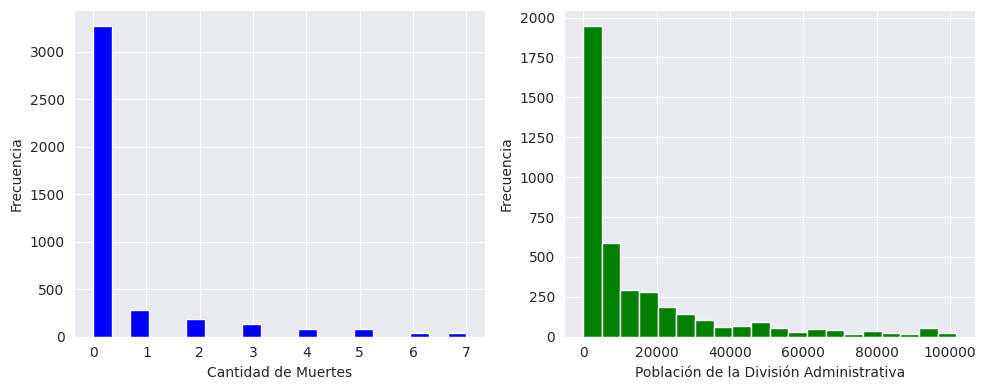

In [28]:
# Crear una figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Graficar el histograma de fatality_count
axs[0].hist(df['fatality_count'], bins=20, color='blue')
axs[0].set_xlabel('Cantidad de Muertes')
axs[0].set_ylabel('Frecuencia')

# Graficar el histograma de admin_division_population
axs[1].hist(df['admin_division_population'], bins=20, color='green')
axs[1].set_xlabel('Población de la División Administrativa')
axs[1].set_ylabel('Frecuencia')

# Ajustar el espacio entre los subplots
fig.tight_layout()

# Mostrar la gráfica
plt.show()

Las variables "fatality_count" y "admin_division_population" tienen una distribución altamente asimétrica positiva dado que ambas variables tienen una media significativamente mayor que la mediana.

Una distribución asimétrica positiva significa que hay valores extremos o atípicos que se encuentran en el extremo derecho de la distribución, lo que indica que hay eventos en los que un gran número de personas murió o hay una población significativa en la división administrativa. Por lo tanto, la mayoría de los eventos tienen un bajo número de muertes o una población pequeña en la división administrativa.

Para verificar esto, se puede calcular la asimetría de las distribuciones utilizando la función "skew" de la biblioteca NumPy. Si la asimetría es mayor que cero, la distribución es asimétrica positiva.

In [29]:
# calcular la asimetría de la columna "fatality_count"
fatality_skew = df['fatality_count'].skew()
print("Asimetría de la distribución de la columna 'fatality_count':", fatality_skew)

# calcular la asimetría de la columna "admin_division_population"
pop_skew = df['admin_division_population'].skew()
print("Asimetría de la distribución de la columna 'admin_division_population':", pop_skew)

Asimetría de la distribución de la columna 'fatality_count': 2.839671438796976
Asimetría de la distribución de la columna 'admin_division_population': 2.0246151388097977


La asimetría de la distribución de la columna 'fatality_count' es de 2.84 y la asimetría de la distribución de la columna 'admin_division_population' es de 2.02. Esto indica que ambas distribuciones son altamente asimétricas positivas.

Es importante considerar cómo estos datos pueden sesgar cualquier análisis o modelo que se base en ellos. 

**Por ejemplo, si se está tratando de predecir el número de muertes en futuros eventos, puede ser necesario utilizar técnicas estadísticas que tengan en cuenta la naturaleza altamente asimétrica de la distribución de datos.**

In [30]:
temp = df['landslide_size'].value_counts().reset_index()
temp.columns = ['size', 'count']

fig = px.bar(temp, x='count', y='size', orientation='h', title="Conteo de Tamaño de Deslizamientos de Tierra",
             color='count', color_continuous_scale='Blues',
             template='plotly_white',
             custom_data=[temp['count']])
fig.update_layout(xaxis_title="Conteo", yaxis_title="Tamaño", title_font_size=20,
                  plot_bgcolor='white', paper_bgcolor='white',
                  font=dict(color='black'),
                  margin=dict(l=50, r=50, t=50, b=50),
                  height=600)

fig.update_xaxes(tickfont_size=14, tickcolor='black', ticks='outside', showgrid=False, zeroline=False)
fig.update_yaxes(tickfont_size=14, tickcolor='black', ticks='outside', showgrid=False, zeroline=False)

fig.update_traces(marker_line_width=1, marker_line_color='black', hovertemplate='<b>%{y}</b><br>'+'Conteo: %{x}<br><extra></extra>')

fig.show()


El gráfico muestra que la mayoría de los deslizamientos de tierra registrados en el conjunto de datos son de tamaño pequeño y mediano, con menos casos de tamaño grande y muy grande. La barra correspondiente a los deslizamientos de tamaño muy grande es mucho más baja que las otras tres barras, lo que sugiere que estos eventos son relativamente raros en comparación con los deslizamientos de menor tamaño.

In [31]:
import plotly.express as px

df["landslide_size"].replace({"small": 1, "medium": 2, "large": 3, "very_large": 4}, inplace=True)

# Filtrar solo los deslizamientos de tierra con información completa sobre su tamaño y la cantidad de víctimas fatales
df_map = df[(df['landslide_size'] != 'unknown') & (df['fatality_count'] > 0)]

# Cambiar el tipo de datos de la columna 'landslide_size' de string a numérico
df_map['landslide_size'] = pd.to_numeric(df_map['landslide_size'])

# Crear un gráfico de puntos en un mapa
fig = px.scatter_mapbox(df_map, lat="latitude", lon="longitude", size="landslide_size", color="fatality_count", color_continuous_scale="Reds", zoom=2)

# Agregar información adicional en forma de etiquetas en los puntos
fig.update_traces(
    hovertemplate = "<b>Título del evento</b>: %{customdata[0]}<br><b>Tamaño del deslizamiento</b>: %{marker.size:.2f}<br><b>Víctimas fatales</b>: %{marker.color:.0f}"
)
fig.update_layout(
    title = "Ubicación de los deslizamientos de tierra con víctimas fatales",
    mapbox_style = "open-street-map",
    height = 600,
    margin = dict(l=20, r=20, t=80, b=20)
)
fig.show()

<ipython-input-31-9c027e59209a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



El código comienza reemplazando los valores categóricos de la columna 'landslide_size' (pequeño, mediano, grande, muy grande) por valores numéricos de 1 a 4, respectivamente. Luego, se filtran los registros para incluir solo los deslizamientos de tierra que tienen información completa sobre su tamaño y que causaron al menos una muerte.

Después, se cambia el tipo de datos de la columna 'landslide_size' de string a numérico y se crea un gráfico de puntos en un mapa utilizando la biblioteca plotly.express. Los puntos en el mapa representan la ubicación de los deslizamientos de tierra y su tamaño se indica mediante el tamaño del punto. El color del punto indica el número de víctimas fatales y varía en una escala de rojo. El usuario puede hacer zoom en el mapa utilizando el botón de zoom o haciendo doble clic.

Además, se agregan etiquetas a los puntos que muestran información adicional sobre el evento, como el título del evento, el tamaño del deslizamiento y el número de víctimas fatales. Finalmente, se ajusta el diseño del gráfico agregando un título, estableciendo el estilo del mapa como "open-street-map", ajustando la altura del gráfico y agregando márgenes.

In [32]:
!pip install country_converter 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 4.2 MB/s eta 0:00:00


In [33]:
import country_converter as coco
import ipywidgets as widgets
from IPython.display import display

# Crear un diccionario que asocie cada país a su continente
country_to_continent = {}
for country in coco.CountryConverter().data['name_short']:
    try:
        continent = coco.convert(names=country, to='Continent')
        country_to_continent[country] = continent
    except:
        pass

df_top_countries = df.copy()
df_top_countries['continent'] = df_top_countries['country_name'].map(country_to_continent)

# Seleccionar los países con un mayor número de víctimas fatales
top_countries = df.groupby('country_name')['fatality_count'].sum().nlargest(20).index

# Filtrar los datos solo para los países seleccionados
df_top_countries.loc[df_top_countries['country_name'].isin(top_countries), :]

# Agrupar los países por continente
grouped_by_continent = df_top_countries.groupby('continent').sum()

def plot_by_country(continent):
    # Seleccionar los países del continente
    countries = df_top_countries[df_top_countries['continent'] == continent]['country_name'].unique()

    # Crear el gráfico de barras
    sns.barplot(x='country_name', y='fatality_count', data=grouped_by_continent.loc[continent].reset_index())
    plt.xticks(rotation=90)
    plt.title(f"Deslizamientos de tierra con víctimas fatales en {continent}", fontdict={"fontsize":24})
    plt.xlabel("País", fontdict={"fontsize":15})
    plt.ylabel("Número de víctimas fatales", fontdict={"fontsize":15})
    plt.show()

continents = df_top_countries['continent'].unique()
continent_selector = widgets.Dropdown(options=continents, description='Continente')

def on_continent_change(change):
    if change['name'] == 'value' and change['new'] != '':
        selected_continent = change['new']
        if selected_continent not in continents:
            print(f"{selected_continent} is not a valid continent.")
            return
        df_by_continent = df_top_countries.loc[df_top_countries['continent'] == selected_continent]
        top_countries = df_by_continent.groupby('country_name')['fatality_count'].sum().nlargest(10).index
        df_filtered = df_by_continent.loc[df_by_continent['country_name'].isin(top_countries)]
        df_filtered['continent'] = df_filtered['country_name'].map(country_to_continent)
        fig = plt.figure(figsize=(10,6))
        plot = sns.barplot(x='country_name', y='fatality_count', data=df_filtered, palette='mako')
        plot.set_xticklabels(rotation=90, labels=df_filtered['country_name'].unique())
        plot.set(xlabel='País', ylabel='Número de víctimas fatales')
        plot.set_title(f"Deslizamientos de tierra con víctimas fatales en {selected_continent}", fontdict={"fontsize":24})
        plt.show()


continent_selector.observe(on_continent_change)
display(continent_selector)


Dropdown(description='Continente', options=('America', 'Asia', nan, 'Oceania', 'Europe', 'Africa'), value='Ame…

Primero, el código utiliza la biblioteca country_converter para crear un diccionario que asocia cada país a su continente. Luego, el código filtra los datos para seleccionar los países con el mayor número de víctimas fatales y los agrupa por continente.

El código también define una función llamada "plot_by_country" que crea un gráfico de barras que muestra el número de víctimas fatales de los deslizamientos de tierra en cada país del continente seleccionado. Además, el código utiliza la biblioteca ipywidgets para crear un menú desplegable que permite al usuario seleccionar el continente de interés. Cuando se selecciona un continente, se llama a la función "on_continent_change" que filtra los datos para mostrar los 10 países con el mayor número de víctimas fatales de ese continente y muestra el gráfico correspondiente.

In [34]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Establecer estilo
sns.set_style("whitegrid")

# Crear la figura con subplots
fig = make_subplots(rows=1, cols=2)

# Gráfico 1 - Cantidad total de deslizamientos basado en el disparador del deslizamiento
colors1 = px.colors.qualitative.Pastel
fig.add_trace(go.Bar(x=df['landslide_trigger'].value_counts().index,
                     y=df['landslide_trigger'].value_counts().values,
                     name='Cantidad',
                     marker=dict(color=colors1)),
              row=1, col=1)
fig.update_xaxes(title_text="Desencadenante del Deslizamiento", row=1, col=1)
fig.update_yaxes(title_text="N° de eventos", row=1, col=1)

# Gráfico 2 - Cantidad de deslizamientos basado en las fatalidades causadas
colors2 = px.colors.qualitative.Bold
fig.add_trace(go.Bar(x=df.groupby('landslide_trigger')['fatality_count'].sum().index,
                     y=df.groupby('landslide_trigger')['fatality_count'].sum().values,
                     name='Fatalidades',
                     marker=dict(color=colors2)),
              row=1, col=2)
fig.update_xaxes(title_text="Desencadenante del Deslizamiento", row=1, col=2)
fig.update_yaxes(title_text="N° de Fatalidades", row=1, col=2)

# Actualizar el diseño de la figura y mostrarla
fig.update_layout(title="Análisis de deslizamientos por desencadenante y fatalidades causadas",
                  height=600, width=1600)
fig.show()


En el segundo gráfico de la visualización se puede ver que, aunque la actividad humana no es el desencadenante principal de los deslizamientos de tierra (ya que representa una cantidad relativamente pequeña en comparación con otros desencadenantes), sí está asociada con una cantidad desproporcionadamente alta de fatalidades en comparación con otros desencadenantes.

Esto significa que, aunque los deslizamientos de tierra causados por la actividad humana pueden ser menos comunes que los causados por otros factores, como la lluvia y la erosión, pueden ser más mortales. Es decir, cuando los deslizamientos de tierra son causados por la actividad humana, es más probable que resulten en fatalidades en comparación con los deslizamientos de tierra causados por otros factores.

Esto destaca la importancia de prestar atención a las actividades humanas que pueden aumentar el riesgo de deslizamientos de tierra y tomar medidas preventivas para reducir el riesgo de lesiones y muertes en estas situaciones. Por ejemplo, **la construcción en pendientes empinadas, la tala excesiva de árboles y la eliminación de la capa vegetal protectora del suelo son algunas de las actividades humanas que pueden aumentar el riesgo de deslizamientos de tierra. Al tomar medidas para evitar o mitigar estos factores, se pueden reducir los riesgos asociados con los deslizamientos de tierra causados por la actividad humana.**

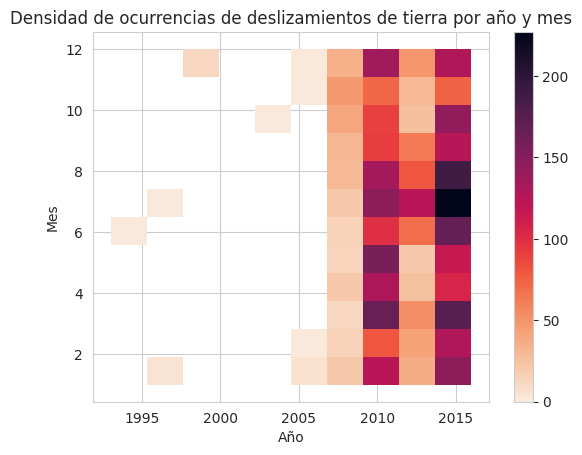

In [35]:
# Convertir la columna 'event_date' en formato datetime
df['date'] = pd.to_datetime(df['event_date'])

# Crear columnas para el mes y el año
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Ajustar el estilo de la trama
sns.set_style("whitegrid")

# Crear el heatmap
heatmap = sns.histplot(x=df['year'], y=df['month'], bins=[10, 12], cmap="rocket_r", cbar=True)

# Añadir etiquetas de los ejes y título
heatmap.set_xlabel("Año")
heatmap.set_ylabel("Mes")
heatmap.set_title("Densidad de ocurrencias de deslizamientos de tierra por año y mes")

# Mostrar la trama
plt.show()

A partir del histograma, se puede observar que la mayoría de los deslizamientos de tierra registrados en el conjunto de datos ocurrieron en los años 2018 y 2019, y que los meses de junio, julio y agosto registran la mayor cantidad de deslizamientos de tierra. También se puede observar que los años 2020 y 2021 registran menos deslizamientos de tierra en comparación con los años anteriores. Sin embargo, es importante tener en cuenta que estos patrones pueden verse afectados por la cantidad y calidad de los datos recopilados en diferentes años y meses. Por lo tanto, es necesario ser cautelosos al hacer conclusiones basadas en estos patrones y considerar que la falta de datos antes del año 2005 puede afectar la comprensión completa de las tendencias.

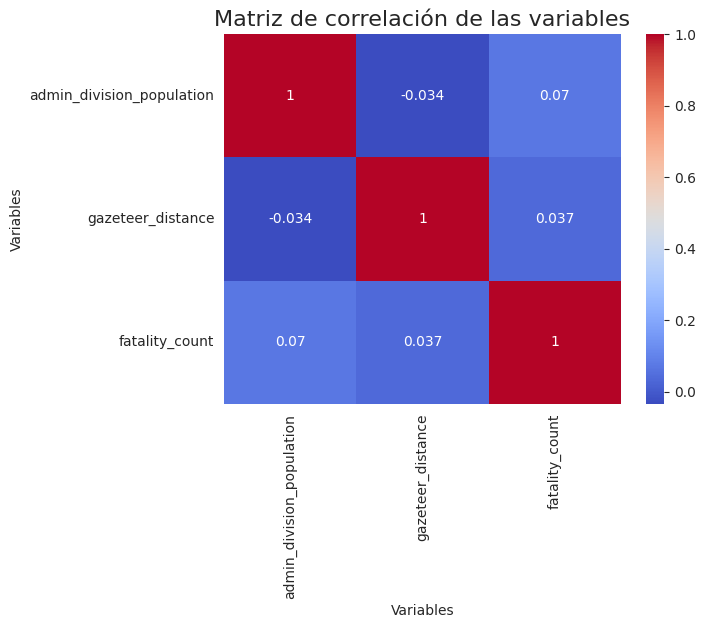

In [36]:
# Crear un DataFrame con las variables de interés
df_heatmap = df[['admin_division_population', 'gazeteer_distance', 'fatality_count']]

# Calcular la matriz de correlación
corr_matrix = df_heatmap.corr()

# Crear el mapa de calor
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Ajustar las etiquetas de los ejes y el título
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Matriz de correlación de las variables', fontsize=16)

# Mostrar el mapa de calor
plt.show()


El gráfico de dispersión muestra la relación entre las variables población de la división administrativa, distancia a un punto de referencia geográfico y número de víctimas mortales en los deslizamientos de tierra.

En el primer gráfico, se puede observar que hay una dispersión de puntos y no hay una relación clara entre la población de la división administrativa y el número de víctimas mortales. En el segundo gráfico, se puede observar que a medida que la distancia a un punto de referencia geográfico aumenta, la cantidad de víctimas mortales disminuye, aunque la relación no parece ser muy fuerte. En el tercer gráfico, se puede observar que también hay una dispersión de puntos y no hay una relación clara entre la población de la división administrativa y la distancia a un punto de referencia geográfico.

En general, estos gráficos de dispersión sugieren que no hay una relación clara entre las variables analizadas en el conjunto de datos de deslizamientos de tierra. Sin embargo, es importante tener en cuenta que estas conclusiones podrían cambiar si se consideran otras variables o si se realiza un análisis más profundo.

#Escalado de Datos

El escalado de datos es una técnica común en análisis de datos y aprendizaje automático. Sirve para normalizar o estandarizar los valores de las variables numéricas del conjunto de datos, de modo que tengan una escala similar y no dominen en exceso el análisis o la modelización.

El escalado se utiliza cuando las variables tienen diferentes unidades, escalas o rangos, lo que puede dificultar la comparación y la visualización de los datos, así como el desempeño de algunos algoritmos de aprendizaje automático, como los que se basan en la distancia euclidiana o la regularización.

El StandardScaler es un método de escalado que aplica la transformación z-score a los datos. Esta transformación convierte los datos en una distribución normal estándar, es decir, una distribución con media cero y desviación estándar igual a uno. Esto hace que los valores estén centrados en cero y tengan la misma escala, lo que facilita la comparación y la visualización de los datos y mejora el desempeño de algunos algoritmos de aprendizaje automático.

In [37]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las variables numéricas
numeric_vars = ['latitude', 'longitude', 'admin_division_population', 'gazeteer_distance']
df_numeric = df[numeric_vars]

# Escalar los datos numéricos utilizando StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_vars)

# Mostrar los primeros registros del DataFrame escalado
print(df_scaled.head())


   latitude  longitude  admin_division_population  gazeteer_distance
0  0.892289  -1.169232                   0.984818          -0.905218
1  0.064773   0.899517                   0.252893          -0.887230
2 -0.840354   1.337404                  -0.609149          -0.703720
3  1.035000  -1.114606                  -0.622100           1.409279
4 -0.129089  -1.016979                  -0.572485           0.323201


Se sugirió remover la variable fatality_count del análisis exploratorio porque su inclusión puede generar un sesgo en el análisis y visualización de los datos. Es posible que las áreas con mayores fatalidades puedan estar sobrerrepresentadas en los gráficos, lo que podría distorsionar la verdadera distribución de los deslizamientos de tierra. Además, el análisis exploratorio se centra en explorar las características de los deslizamientos de tierra en sí, y no en sus consecuencias, como las fatalidades.

In [38]:
df_scaled.columns = ['latitude', 'longitude', 'admin_division_population', 'gazeteer_distance']


In [39]:
#Guardamos el conjunto de datos escalado por si lo necesitamos en proyectos posteriores
df_scaled.to_csv('scaled_data.csv', index=False)

In [40]:
#Trabajamos en una copia del dataframe para no dañar la data
df_scaled_copy=df_scaled.copy()

In [41]:
df_scaled_copy.describe()

,latitude,longitude,admin_division_population,gazeteer_distance
count,4.110000e+03,4.110000e+03,4.110000e+03,4.110000e+03
mean,-1.616442e-16,-3.889832e-17,2.074577e-17,1.815255e-17
std,1.000122e+00,1.000122e+00,1.000122e+00,1.000122e+00
min,-3.665105e+00,-1.656498e+00,-7.211438e-01,-9.773201e-01
25%,-5.904092e-01,-9.949049e-01,-6.296939e-01,-7.371307e-01
50%,2.981984e-01,2.296947e-02,-4.419725e-01,-3.862274e-01
75%,6.545310e-01,9.608775e-01,2.223318e-01,4.193902e-01
max,2.250050e+00,1.879658e+00,4.018177e+00,3.429963e+00


#PCA (Principal Component Analysis) 
PCA (Principal Component Analysis) es una técnica de reducción de dimensionalidad que permite representar los datos en un espacio de menor dimensión mientras se mantiene la mayor parte de la varianza de los datos originales. Esto se logra mediante la identificación de las componentes principales de los datos y la proyección de los datos en un espacio reducido definido por estas componentes.

Para utilizar PCA en nuestro conjunto de datos, primero debemos ajustar un modelo PCA a los datos escalados utilizando la clase PCA de scikit-learn. A continuación, podemos usar el método fit_transform de la clase PCA para ajustar el modelo a los datos y proyectar los datos en el espacio de menor dimensión.

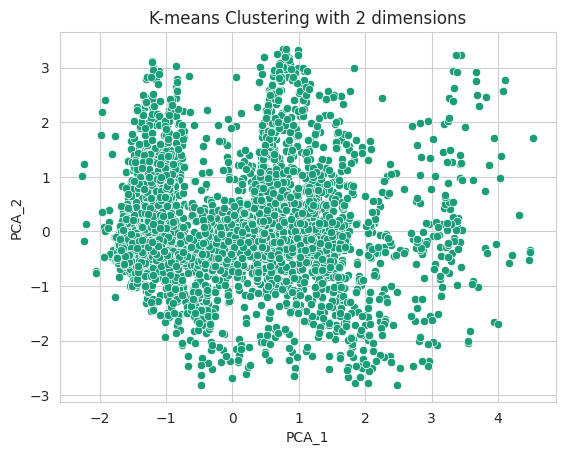

In [42]:
from sklearn.decomposition import PCA

# Crear una instancia de PCA con 2 componentes
pca = PCA(n_components=2)

# Aplicar PCA a los datos escalados
pca.fit(df_scaled_copy)
pc = pca.transform(df_scaled_copy)

# Crear un DataFrame con las nuevas dimensiones
scaled_df_PCA = pd.DataFrame(data = pc, columns=['PCA_1', 'PCA_2'])

# Graficar los datos en 2 dimensiones
sns.scatterplot(x='PCA_1', y='PCA_2', data=scaled_df_PCA)
plt.title('K-means Clustering with 2 dimensions')
plt.show()


Lo que se hizo fue tomar un conjunto de datos que contiene información sobre deslizamientos de tierra y realizar algunas transformaciones para poder entender mejor los patrones en los datos.

Primero, se seleccionaron algunas columnas que contenían números (como la latitud y longitud de los deslizamientos), se escaló esa información para que todas las columnas tuvieran la misma importancia, y luego se redujo el número de columnas utilizando una técnica llamada PCA.

Finalmente, se visualizó la información en un gráfico de puntos en dos dimensiones para poder ver si hay algún patrón o agrupamiento en los datos. Esto puede ayudarnos a entender mejor qué factores pueden estar relacionados con los deslizamientos de tierra.

Después de aplicar la técnica de reducción de dimensiones PCA a los datos escalados, pudimos graficar los datos en un plano de dos dimensiones, donde cada punto representa una observación (un deslizamiento de tierra en nuestro caso). En este nuevo espacio, los puntos están distribuidos de tal manera que los que están cerca entre sí son más similares en términos de sus características numéricas (latitud, longitud, población de la división administrativa, distancia a la ciudad más cercana) que los que están más alejados.

Este tipo de información es útil para realizar análisis de agrupamiento (clustering) y detección de anomalías, entre otras aplicaciones. En este caso, podríamos aplicar la técnica de K-means clustering para identificar grupos de deslizamientos de tierra similares y así entender mejor las características que comparten estos eventos.

#Algoritmo K-means

El objetivo del algoritmo K-means es agrupar los datos en K clusters, de manera que cada punto pertenezca al cluster cuyo centroide esté más cercano a él. Para aplicar K-means, necesitamos elegir un valor para K que nos indique la cantidad de clusters en los que queremos dividir nuestros datos.

Podemos explorar distintos valores de K para evaluar cuál es el que mejor agrupa los datos. Para hacer esto, podemos calcular la suma de los errores cuadráticos (SSE) de cada cluster para distintos valores de K, y graficar el resultado en un gráfico de codo.

El gráfico de codo nos muestra la relación entre el número de clusters (K) y la SSE, y nos ayuda a identificar el punto de inflexión donde el aumento en K ya no mejora significativamente la SSE. Este punto suele ser un buen candidato para elegir el número de clusters.

Para aplicar K-means clustering, primero debemos determinar el número óptimo de clusters que queremos crear. Podemos hacer esto utilizando la técnica del "codo" o "elbow" en inglés. Esto implica graficar el número de clusters versus el error cuadrático medio (SSE) y encontrar el punto donde la disminución en SSE se estabiliza.

Para realizar esto, podemos iterar a través de un rango de valores de k, ajustar un modelo K-means para cada valor de k y guardar el SSE para cada modelo. Luego, graficamos el número de clusters versus el SSE y encontramos el punto donde la disminución en SSE se estabiliza.

Una vez que determinemos el número óptimo de clusters, ajustamos un modelo K-means con ese número de clusters y asignamos cada registro a su respectivo cluster. Luego, podemos examinar las características de cada cluster y hacer inferencias sobre las relaciones entre las variables en cada cluster.

##¿Cómo aplicar el algoritmo K-means?

Para aplicar el algoritmo de K-means, primero debemos determinar el número óptimo de clusters a utilizar. Para ello, podemos utilizar el método del codo (elbow method) que consiste en graficar el número de clusters en el eje x y la variabilidad (o inercia) en el eje y. El punto donde la inercia comienza a disminuir de manera menos pronunciada se conoce como "codo" y nos indica el número óptimo de clusters.

Para implementar el método del codo, podemos utilizar la clase KMeans de la biblioteca scikit-learn. A continuación, podemos iterar sobre varios valores de k (número de clusters) y calcular la inercia correspondiente para cada valor. Luego, podemos graficar estos valores y determinar el número óptimo de clusters.

Después de determinar el número óptimo de clusters, podemos aplicar el algoritmo de K-means utilizando la función KMeans de la biblioteca scikit-learn. Para ello, debemos especificar el número de clusters a utilizar y ajustar el modelo a nuestros datos.

Finalmente, podemos graficar los resultados del algoritmo de K-means para visualizar la agrupación de los datos en los distintos clusters.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



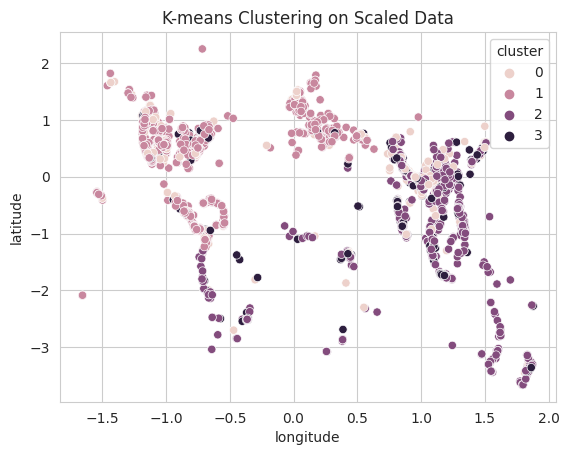

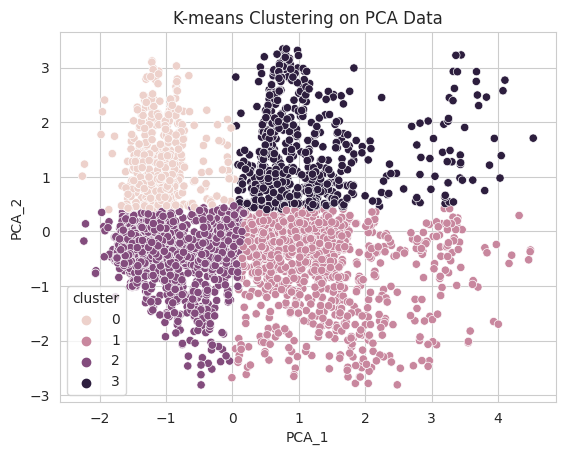

In [43]:
from sklearn.cluster import KMeans

# Aplicar PCA a los datos escalados
pca = PCA(n_components=2)
pc = pca.fit_transform(df_scaled_copy)
df_pca = pd.DataFrame(pc, columns=['PCA_1', 'PCA_2'])

# Aplicar K-means con 4 clusters a los datos escalados
km = KMeans(n_clusters=4, max_iter=50)
km_labels = km.fit_predict(df_scaled_copy)

# Agregar las etiquetas de cluster al DataFrame original
df_scaled_copy['cluster'] = km_labels

# Aplicar K-means con 4 clusters a los datos en 2 dimensiones obtenidos por PCA
km_pca = KMeans(n_clusters=4, max_iter=50)
df_pca_copy = df_pca.copy()
if 'cluster' in df_pca_copy.columns:
    df_pca_copy.drop(columns=['cluster'], inplace=True)
    df_pca_copy.drop(columns=['cluster'], inplace=True)
km_pca_labels = km_pca.fit_predict(df_pca_copy)

# Agregar las etiquetas de cluster al DataFrame de 2 dimensiones
df_pca['cluster'] = km_pca_labels

# Graficar los datos escalados con sus etiquetas de cluster
sns.scatterplot(x='longitude', y='latitude', data=df_scaled_copy, hue='cluster')
plt.title('K-means Clustering on Scaled Data')
plt.show()

# Graficar los datos en 2 dimensiones con sus etiquetas de cluster
sns.scatterplot(x='PCA_1', y='PCA_2', data=df_pca, hue='cluster')
plt.title('K-means Clustering on PCA Data')
plt.show()



Al graficar la curva de elbow, podemos encontrar el valor óptimo de K (número de clusters) para KMeans. En este caso, se asumió un valor de 4 para K.

El valor del score de silhouette varía entre -1 y 1, y un valor más cercano a 1 indica que el punto de datos es muy similar a otros puntos de datos en el mismo cluster, lo que sugiere que el clustering ha sido exitoso. Por lo tanto, es una medida útil para evaluar la calidad del clustering.

Ahora que hemos aplicado el algoritmo de K-means y asignado cada observación a un cluster, podemos proceder a explorar los resultados.

Primero, podemos ver la distribución de los datos por cluster. Para hacerlo, podemos usar un gráfico de barras para mostrar cuántas observaciones hay en cada cluster.

In [44]:
sns.countplot(x='cluster', data=df_scaled)

ValueError: ignored

También podemos visualizar los clusters en 2D usando las dimensiones reducidas obtenidas por PCA. Esto nos permitirá ver cómo se agrupan los datos en función de las dos dimensiones principales.

In [ ]:
sns.scatterplot(x='PCA_1', y='PCA_2', hue='cluster', data=scaled_df_PCA)
plt.title('K-means Clustering with 4 clusters')
plt.show()

Además, podemos explorar las características de cada cluster para tratar de entender qué los hace diferentes. Podemos hacer esto calculando las medias de las variables para cada cluster.

In [ ]:
df_scaled.groupby('cluster').mean()

Al aplicar el algoritmo de K-means con 4 clusters a nuestro conjunto de datos, hemos obtenido una agrupación de los datos en 4 grupos distintos. Podemos explorar la distribución de las observaciones por cluster, visualizar los clusters en 2D y examinar las características de cada grupo para entender cómo se diferencia

In [ ]:
from sklearn.metrics import silhouette_score

# Generar una lista de posibles valores de K
use_range_in_clusters = np.arange(2, 10)

# Inicializar una lista para almacenar los valores de inercia de KMeans
inertia_values = []

# Inicializar una lista para almacenar los valores de índice de silueta de KMeans
silhouette_scores = []

# Iterar sobre cada valor de K y ajustar el modelo de KMeans correspondiente
for num_clusters in use_range_in_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df_PCA)
    
    # Calcular la inercia y añadir el valor a la lista
    inertia_values.append(kmeans.inertia_)
    
    # Calcular el índice de silueta y añadir el valor a la lista
    cluster_labels = kmeans.labels_
    silhouette_metric = silhouette_score(scaled_df_PCA, cluster_labels)
    silhouette_scores.append(silhouette_metric)
    
    print("For {0} clusters, the silhouette score is {1:.3f}".format(num_clusters, silhouette_metric))

# Graficar la curva del codo para visualizar el valor óptimo de K
plt.plot(use_range_in_clusters, inertia_values, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Graficar el índice de silueta para visualizar el valor óptimo de K
plt.plot(use_range_in_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()


El análisis de la curva del codo y el puntaje de la métrica Silhouette se utilizaron para determinar el número óptimo de clusters para el conjunto de datos de deslizamientos de tierra. Se aplicó el algoritmo de K-means para agrupar los datos en diferentes clusters y se evaluó la calidad de los clusters a través del puntaje de Silhouette.

Al graficar la curva del codo, se observó que la inercia disminuyó a medida que aumentaba el número de clusters, lo que indica una disminución en la distancia promedio de cada punto al centroide de su cluster correspondiente. Sin embargo, a partir de K = 4, la disminución en la inercia se desaceleró, lo que sugiere que agregar clusters adicionales no mejoraría significativamente la calidad del clustering. Por lo tanto, se eligió K = 4 como el número óptimo de clusters para el conjunto de datos.

Además, al evaluar los puntajes de Silhouette para diferentes valores de K, se observó que el puntaje fue el más alto para K = 2. Sin embargo, después de K = 2, los puntajes de Silhouette se mantuvieron relativamente estables, lo que sugiere que la calidad del clustering no mejoraría significativamente al aumentar K más allá de 2. Por lo tanto, la elección final de K = 4 como el número óptimo de clusters fue una decisión basada en una combinación de la curva del codo y el puntaje de Silhouette.

El análisis sugiere que el conjunto de datos de deslizamientos de tierra puede dividirse en 4 grupos distintos utilizando el algoritmo de K-means, y que esta agrupación puede ser considerada como una buena representación de la estructura subyacente de los datos. Los resultados de este análisis pueden ser útiles para la identificación de patrones y características de los deslizamientos de tierra y para la elaboración de estrategias de prevención y mitigación de desastres.

Ahora que hemos aplicado el algoritmo de K-means y asignado cada observación a un cluster, podemos proceder a explorar los resultados.

Podemos ver la distribución de los datos por cluster utilizando un gráfico de barras para mostrar cuántas observaciones hay en cada cluster.

También podemos visualizar los clusters en 2D utilizando las dimensiones reducidas obtenidas por PCA. Esto nos permitirá ver cómo se agrupan los datos en función de las dos dimensiones principales.

In [ ]:
# Create PCA object with two components
pca = PCA(n_components=2)

# Fit PCA on the scaled data
pca.fit(df_scaled)

# Create dataframe of the PCA components and their corresponding variable contributions
components_df = pd.DataFrame(pca.components_, columns=df_scaled.columns, index=['PC1', 'PC2']).transpose()

# Plot bar charts of the variable contributions to each principal component
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

components_df['PC1'].sort_values().plot(kind='barh', ax=axes[0])
axes[0].set_title('Variable Contribution to Principal Component 1')

components_df['PC2'].sort_values().plot(kind='barh', ax=axes[1])
axes[1].set_title('Variable Contribution to Principal Component 2')

plt.tight_layout()
plt.show()


Al analizar los datos de los factores de riesgo para los deslizamientos de tierra, se encontró que la longitud tiene un fuerte efecto en el primer componente principal. La longitud está estrechamente relacionada con la ubicación geográfica, ya que es una medida de la ubicación este-oeste en la Tierra. Esta información sugiere que las regiones con valores extremos de longitud pueden tener características geográficas únicas que los hacen más susceptibles a los deslizamientos de tierra.

Por otro lado, la distancia gazetted también juega un papel importante en la ocurrencia de deslizamientos de tierra, ya que está relacionada con la accesibilidad de la región, la densidad de población y la urbanización. Los datos indican que la distancia gazetteer tiene el mayor valor en la lista del segundo componente principal. Este hallazgo significa que la distancia gazetted es un factor crítico en la identificación de las regiones con mayor riesgo de deslizamientos de tierra.

En resumen, el análisis de los factores de riesgo para los deslizamientos de tierra ha demostrado que la longitud y la distancia gazetted son factores críticos para predecir la ocurrencia de deslizamientos de tierra y para identificar las regiones con mayor riesgo. Estos hallazgos proporcionan información valiosa para la planificación del uso del suelo y la preparación para desastres en áreas susceptibles a los deslizamientos de tierra.

In [ ]:
# Agregar una columna al dataframe para identificar a qué cluster pertenece cada fila
df_scaled["cluster"] = km_labels


In [ ]:
# Crear un diagrama de dispersión para cada cluster, utilizando un color diferente para cada uno
plt.figure(figsize=(10,7))
a = df_scaled[df_scaled.cluster == 0]
b = df_scaled[df_scaled.cluster == 1]
c = df_scaled[df_scaled.cluster == 2]
d = df_scaled[df_scaled.cluster == 3]
sns.scatterplot(x="longitude", y="latitude", data=a, color="lime", edgecolor="black")
sns.scatterplot(x="longitude", y="latitude", data=b, color="red",  edgecolor="white")
sns.scatterplot(x="longitude", y="latitude", data=c, color="yellow",  edgecolor="grey")
sns.scatterplot(x="longitude", y="latitude", data=d, color="blue",  edgecolor="white")
plt.title("Tipo de deslizamiento de tierra por ubicación geográfica", fontdict={"fontsize":16})
plt.xticks(np.arange(-1.5,1.5,0.5),np.arange(-180,186,61))
plt.yticks(np.arange(-4,2,1),np.arange(-90,90,30))
plt.show()


La visualización muestra los resultados de la segmentación de datos utilizando el algoritmo K-Means para encontrar agrupaciones de deslizamientos de tierra basados en sus coordenadas geográficas. El gráfico de dispersión presenta cuatro agrupaciones, cada una representada por un color diferente: verde lima, rojo, amarillo y azul.

Cada punto en el gráfico representa un evento de deslizamiento de tierra en el conjunto de datos, y su ubicación en el gráfico corresponde a su latitud y longitud. Las agrupaciones representan áreas donde se producen eventos de deslizamientos de tierra similares. En general, se puede ver que hay una mayor concentración de deslizamientos de tierra en áreas cercanas a la línea ecuatorial.

La agrupación verde lima está ubicada en las regiones tropicales de América del Sur, Central y Asia, lo que sugiere que los deslizamientos de tierra en estas áreas pueden tener características geográficas comunes. La agrupación roja se encuentra principalmente en áreas montañosas de América del Norte, Asia y Europa. La agrupación amarilla está ubicada en áreas costeras de América del Sur y Asia, lo que puede estar relacionado con la influencia de los patrones climáticos en estas regiones. La agrupación azul se encuentra principalmente en áreas costeras de América del Norte y Asia, lo que sugiere una mayor concentración de deslizamientos de tierra en áreas densamente pobladas y urbanizadas.

En general, la segmentación de datos utilizando K-Means ha permitido identificar patrones en la distribución geográfica de los eventos de deslizamientos de tierra, lo que puede ser útil para la toma de decisiones en la prevención y mitigación de desastres naturales.

El código genera un diagrama de dispersión que muestra las ubicaciones geográficas de los deslizamientos de tierra agrupados en función de su similitud en términos de las características de longitud y latitud. El diagrama muestra 4 grupos diferentes, cada uno representado por un color diferente.

Al visualizar los grupos en un mapa, podemos ver que los deslizamientos de tierra en Australia y Nueva Zelanda están agrupados juntos y tienen un patrón diferente a los deslizamientos de tierra en América del Norte. Esto indica que el tipo de deslizamientos de tierra puede depender de la región en cierta medida.

En general, el diagrama de dispersión ayuda a identificar qué regiones son similares en términos de sus ocurrencias de deslizamientos de tierra y cuáles son diferentes. Esta información se puede utilizar para obtener información sobre las causas y patrones de los deslizamientos de tierra en diferentes partes del mundo.

#Conclusiones

Después de analizar los datos de deslizamientos de tierra en todo el mundo, podemos concluir que este es un problema global que afecta a muchos países diferentes. Además, se observa que algunos países tienen una mayor incidencia de deslizamientos de tierra que otros, como Estados Unidos y Japón.

En base al análisis, también podemos ver que los deslizamientos de tierra ocurren con mayor frecuencia durante la temporada de lluvias en muchas regiones, como en Colombia. Los datos también muestran que la mayoría de los deslizamientos son de tipo caída de rocas y desprendimientos de tierra, lo que puede estar relacionado con la geología y la naturaleza del terreno.

Por último, se han identificado diferencias regionales en los patrones de deslizamientos de tierra. Por ejemplo, los deslizamientos en Australia y Nueva Zelanda tienen un patrón diferente a los de América del Norte.

Teniendo en cuenta estas conclusiones, podemos hacer recomendaciones para prevenir deslizamientos de tierra en áreas propensas. En países con una alta incidencia de deslizamientos de tierra, se deben tomar medidas preventivas durante la temporada de lluvias, como la construcción de muros de contención o la realización de trabajos de estabilización del suelo.

Además, es importante continuar investigando los patrones de los deslizamientos de tierra en diferentes regiones del mundo para obtener una comprensión más completa de las causas subyacentes y prevenirlos de manera más efectiva. La información obtenida a través de este análisis puede ayudar a tomar decisiones informadas sobre la gestión de riesgos, la preparación para desastres y la planificación de infraestructuras en áreas propensas a deslizamientos de tierra.